# WATER WELLS IN TANZANIA.

## Overview and Problem Understanding.

After careful evaluation , it has been noted that most wells in tanzania have been experiencing trouble and are faulty. 
A team of 5 was given data and told to help Navesco Company (a water company in Tanzania) to come up with eloquent data and machine understanding to come up 
with different ways in which new and improved wells would help Tanzanians stop experiencing dcrought yet water is sufficient in the country

We were able to get data from a reliable source and it will inturn be of help to us coming up with different models with different results to help in the aid of this project.


Objectives of this project include the following :
1. Build a classifier to predict the condition of a water well and pitch to an NGO focused on locating wells needing repair.


## DATA UNDERSTANDING

The data provided was divided into three different stages and levels which include the following :
1. Testing data values
2. Training data values
3. Testing labels to aid in model creation.

We are required to join the data or use the data just as it is to come up with two or more different models and explanations for the problem .

## DATA EXPLORATION.

We will begin by firstly, importing necessary libraries that will allow us to open the data and get to know what is present in our files .

In [35]:
# import necessary libraries.
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")


#import train and test data libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.model_selection import  GridSearchCV, cross_validate
from sklearn.model_selection import cross_val_predict, cross_val_score, RepeatedStratifiedKFold
from sklearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE


In [3]:
# open our test set data i.e all files and see the data info within the dataset
data1 = pd.read_csv("training_set_values.csv")
data1


,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,...,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,...,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe
2,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,...,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe
3,67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,...,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe
4,19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,...,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59395,60739,10.0,2013-05-03,Germany Republi,1210,CES,37.169807,-3.253847,Area Three Namba 27,0,...,per bucket,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
59396,27263,4700.0,2011-05-07,Cefa-njombe,1212,Cefa,35.249991,-9.070629,Kwa Yahona Kuvala,0,...,annually,soft,good,enough,enough,river,river/lake,surface,communal standpipe,communal standpipe
59397,37057,0.0,2011-04-11,NaN,0,NaN,34.017087,-8.750434,Mashine,0,...,monthly,fluoride,fluoride,enough,enough,machine dbh,borehole,groundwater,hand pump,hand pump
59398,31282,0.0,2011-03-08,Malec,0,Musa,35.861315,-6.378573,Mshoro,0,...,never pay,soft,good,insufficient,insufficient,shallow well,shallow well,groundwater,hand pump,hand pump


In [4]:
#open the test variables (i.e labels)
data2 = pd.read_csv('training_set_labels.csv') 
data2

,id,status_group
0,69572,functional
1,8776,functional
2,34310,functional
3,67743,non functional
4,19728,functional
...,...,...
59395,60739,functional
59396,27263,functional
59397,37057,functional
59398,31282,functional


Using the data above , we can now check the counts present for all values i.e functional,non-functional and spoilt wells .

In [5]:
#join the columns with the training data that resonates.
data2.value_counts()

df = pd.merge(data1, data2, how = 'left', on='id')
df

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group
0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,...,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,...,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional
2,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,...,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe,functional
3,67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,...,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,non functional
4,19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,...,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59395,60739,10.0,2013-05-03,Germany Republi,1210,CES,37.169807,-3.253847,Area Three Namba 27,0,...,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional
59396,27263,4700.0,2011-05-07,Cefa-njombe,1212,Cefa,35.249991,-9.070629,Kwa Yahona Kuvala,0,...,soft,good,enough,enough,river,river/lake,surface,communal standpipe,communal standpipe,functional
59397,37057,0.0,2011-04-11,NaN,0,NaN,34.017087,-8.750434,Mashine,0,...,fluoride,fluoride,enough,enough,machine dbh,borehole,groundwater,hand pump,hand pump,functional
59398,31282,0.0,2011-03-08,Malec,0,Musa,35.861315,-6.378573,Mshoro,0,...,soft,good,insufficient,insufficient,shallow well,shallow well,groundwater,hand pump,hand pump,functional


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59400 entries, 0 to 59399
Data columns (total 41 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     59400 non-null  int64  
 1   amount_tsh             59400 non-null  float64
 2   date_recorded          59400 non-null  object 
 3   funder                 55763 non-null  object 
 4   gps_height             59400 non-null  int64  
 5   installer              55745 non-null  object 
 6   longitude              59400 non-null  float64
 7   latitude               59400 non-null  float64
 8   wpt_name               59398 non-null  object 
 9   num_private            59400 non-null  int64  
 10  basin                  59400 non-null  object 
 11  subvillage             59029 non-null  object 
 12  region                 59400 non-null  object 
 13  region_code            59400 non-null  int64  
 14  district_code          59400 non-null  int64  
 15  lg

In [7]:
df1 = df.copy()

## DATA PROCESSING

Using the dataset created , we can go ahead and begin removal of duplicates and null values and even columns that may not be of help especially with our objectives in play .

In [8]:
#checking for duplicates
df1.duplicated().sum()

0

our observation is that no data is duplicated and all is well with our dataset.


In [9]:
#check for null values 
df1.isna().sum()

id                           0
amount_tsh                   0
date_recorded                0
funder                    3637
gps_height                   0
installer                 3655
longitude                    0
latitude                     0
wpt_name                     2
num_private                  0
basin                        0
subvillage                 371
region                       0
region_code                  0
district_code                0
lga                          0
ward                         0
population                   0
public_meeting            3334
recorded_by                  0
scheme_management         3878
scheme_name              28810
permit                    3056
construction_year            0
extraction_type              0
extraction_type_group        0
extraction_type_class        0
management                   0
management_group             0
payment                      0
payment_type                 0
water_quality                0
quality_

Using the details above, we find out that most columns are  not going to be of help especially with the objectives present .So inorder to have clear colummns , we would be required to drop the unwanted columnns and also remove any null values from the needed columns.

In [10]:
#check the number of columns 
df1.columns

Index(['id', 'amount_tsh', 'date_recorded', 'funder', 'gps_height',
       'installer', 'longitude', 'latitude', 'wpt_name', 'num_private',
       'basin', 'subvillage', 'region', 'region_code', 'district_code', 'lga',
       'ward', 'population', 'public_meeting', 'recorded_by',
       'scheme_management', 'scheme_name', 'permit', 'construction_year',
       'extraction_type', 'extraction_type_group', 'extraction_type_class',
       'management', 'management_group', 'payment', 'payment_type',
       'water_quality', 'quality_group', 'quantity', 'quantity_group',
       'source', 'source_type', 'source_class', 'waterpoint_type',
       'waterpoint_type_group', 'status_group'],
      dtype='object')

Due to the presence of many unrequired columns , we would need to impute them and drop the unwanted columns 


In [14]:
# differentiate the numeric columns to the categorical columns
df1.select_dtypes(include=['object']).columns

Index(['date_recorded', 'funder', 'installer', 'wpt_name', 'basin',
       'subvillage', 'region', 'lga', 'ward', 'public_meeting', 'recorded_by',
       'scheme_management', 'scheme_name', 'permit', 'extraction_type',
       'extraction_type_group', 'extraction_type_class', 'management',
       'management_group', 'payment', 'payment_type', 'water_quality',
       'quality_group', 'quantity', 'quantity_group', 'source', 'source_type',
       'source_class', 'waterpoint_type', 'waterpoint_type_group',
       'status_group'],
      dtype='object')

In [15]:
df1.select_dtypes(include = ['int64', 'float64']).columns

Index(['id', 'amount_tsh', 'gps_height', 'longitude', 'latitude',
       'num_private', 'region_code', 'district_code', 'population',
       'construction_year'],
      dtype='object')

In [16]:
# drop the unrequired columns to avoid data duplication 
columns_to_drop = ['date_recorded', 'funder', 'wpt_name', 'subvillage', 'lga', 
 'ward', 'recorded_by', 'scheme_name', 'extraction_type', 
 'extraction_type_group', 'management', 'payment', 'quality_group', 
 'quantity', 'source', 'source_type', 'waterpoint_type', 'num_private', 
 'region_code', 'district_code']

df1 = df1.drop(columns_to_drop, axis=1)

In [17]:
df2 = df1.copy()
df2.head()

,id,amount_tsh,gps_height,installer,longitude,latitude,basin,region,population,public_meeting,...,permit,construction_year,extraction_type_class,management_group,payment_type,water_quality,quantity_group,source_class,waterpoint_type_group,status_group
0,69572,6000.0,1390,Roman,34.938093,-9.856322,Lake Nyasa,Iringa,109,True,...,False,1999,gravity,user-group,annually,soft,enough,groundwater,communal standpipe,functional
1,8776,0.0,1399,GRUMETI,34.698766,-2.147466,Lake Victoria,Mara,280,NaN,...,True,2010,gravity,user-group,never pay,soft,insufficient,surface,communal standpipe,functional
2,34310,25.0,686,World vision,37.460664,-3.821329,Pangani,Manyara,250,True,...,True,2009,gravity,user-group,per bucket,soft,enough,surface,communal standpipe,functional
3,67743,0.0,263,UNICEF,38.486161,-11.155298,Ruvuma / Southern Coast,Mtwara,58,True,...,True,1986,submersible,user-group,never pay,soft,dry,groundwater,communal standpipe,non functional
4,19728,0.0,0,Artisan,31.130847,-1.825359,Lake Victoria,Kagera,0,True,...,True,0,gravity,other,never pay,soft,seasonal,surface,communal standpipe,functional


## EDA ANALYSIS

### UNIVARIATE ANALYSIS

Now that the data is all cleaned and without any nnull vaalues , we will begin with the analysis section of the project . Firstly, we begin with different singular analysis between different columns and relations.

In [18]:
df2.columns

Index(['id', 'amount_tsh', 'gps_height', 'installer', 'longitude', 'latitude',
       'basin', 'region', 'population', 'public_meeting', 'scheme_management',
       'permit', 'construction_year', 'extraction_type_class',
       'management_group', 'payment_type', 'water_quality', 'quantity_group',
       'source_class', 'waterpoint_type_group', 'status_group'],
      dtype='object')

In [19]:
#Numerical analysis('amount_tsh')
print(df2['amount_tsh'].describe())

count     59400.000000
mean        317.650385
std        2997.574558
min           0.000000
25%           0.000000
50%           0.000000
75%          20.000000
max      350000.000000
Name: amount_tsh, dtype: float64


In [20]:
#categorical data ('payment_type')
print(df2['payment_type'].describe())

count         59400
unique            7
top       never pay
freq          25348
Name: payment_type, dtype: object


In [21]:
#limiting the number of categories present in our training dataset or our predictor .
# Limit to the  top 4 most frequent categories
top_categories = df2['waterpoint_type_group'].value_counts().nlargest(4).index

# Filter the data to only include the top categories
df_filtered = df2[df2['waterpoint_type_group'].isin(top_categories)]
df_filtered


,id,amount_tsh,gps_height,installer,longitude,latitude,basin,region,population,public_meeting,...,permit,construction_year,extraction_type_class,management_group,payment_type,water_quality,quantity_group,source_class,waterpoint_type_group,status_group
0,69572,6000.0,1390,Roman,34.938093,-9.856322,Lake Nyasa,Iringa,109,True,...,False,1999,gravity,user-group,annually,soft,enough,groundwater,communal standpipe,functional
1,8776,0.0,1399,GRUMETI,34.698766,-2.147466,Lake Victoria,Mara,280,NaN,...,True,2010,gravity,user-group,never pay,soft,insufficient,surface,communal standpipe,functional
2,34310,25.0,686,World vision,37.460664,-3.821329,Pangani,Manyara,250,True,...,True,2009,gravity,user-group,per bucket,soft,enough,surface,communal standpipe,functional
3,67743,0.0,263,UNICEF,38.486161,-11.155298,Ruvuma / Southern Coast,Mtwara,58,True,...,True,1986,submersible,user-group,never pay,soft,dry,groundwater,communal standpipe,non functional
4,19728,0.0,0,Artisan,31.130847,-1.825359,Lake Victoria,Kagera,0,True,...,True,0,gravity,other,never pay,soft,seasonal,surface,communal standpipe,functional
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59395,60739,10.0,1210,CES,37.169807,-3.253847,Pangani,Kilimanjaro,125,True,...,True,1999,gravity,user-group,per bucket,soft,enough,groundwater,communal standpipe,functional
59396,27263,4700.0,1212,Cefa,35.249991,-9.070629,Rufiji,Iringa,56,True,...,True,1996,gravity,user-group,annually,soft,enough,surface,communal standpipe,functional
59397,37057,0.0,0,NaN,34.017087,-8.750434,Rufiji,Mbeya,0,True,...,False,0,handpump,user-group,monthly,fluoride,enough,groundwater,hand pump,functional
59398,31282,0.0,0,Musa,35.861315,-6.378573,Rufiji,Dodoma,0,True,...,True,0,handpump,user-group,never pay,soft,insufficient,groundwater,hand pump,functional


Text(0.5, 1.0, ' ')

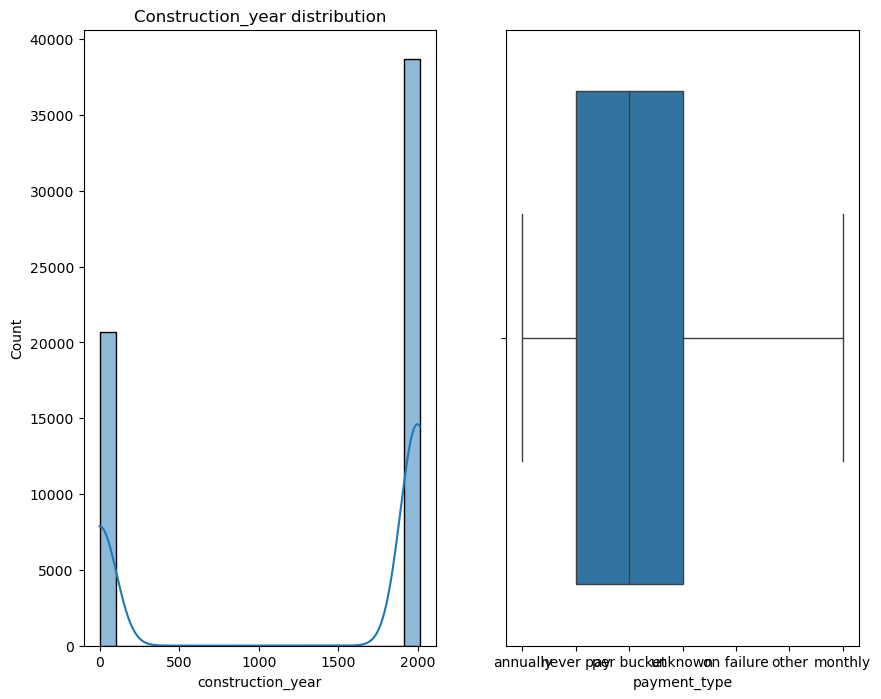

In [22]:
 #histogram for ('construction_year')
plt.figure(figsize=(10,8))

plt.subplot(1, 2, 1)
sns.histplot(df2['construction_year'], kde=True)
plt.title('Construction_year distribution')

#Boxplot for 'waterpoint type  group'
plt.subplot(1, 2, 2)
sns.boxplot(x=df_filtered['payment_type'])
plt.title(' ')



### BIVARIATE ANALYSIS

Now on to bivariate analysis where we analyse different relationships between two data types 
i.e 1. numerical vs categorical
    2. numerical vs numerical
    3. categorical vs categorical


In [23]:
df2.describe()

,id,amount_tsh,gps_height,longitude,latitude,population,construction_year
count,59400.000000,59400.000000,59400.000000,59400.000000,5.940000e+04,59400.000000,59400.000000
mean,37115.131768,317.650385,668.297239,34.077427,-5.706033e+00,179.909983,1300.652475
std,21453.128371,2997.574558,693.116350,6.567432,2.946019e+00,471.482176,951.620547
min,0.000000,0.000000,-90.000000,0.000000,-1.164944e+01,0.000000,0.000000
25%,18519.750000,0.000000,0.000000,33.090347,-8.540621e+00,0.000000,0.000000
50%,37061.500000,0.000000,369.000000,34.908743,-5.021597e+00,25.000000,1986.000000
75%,55656.500000,20.000000,1319.250000,37.178387,-3.326156e+00,215.000000,2004.000000
max,74247.000000,350000.000000,2770.000000,40.345193,-2.000000e-08,30500.000000,2013.000000


C:\Users\Ryan\AppData\Local\Temp\ipykernel_15996\3918337997.py:9: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(x_labels, fontsize=9)


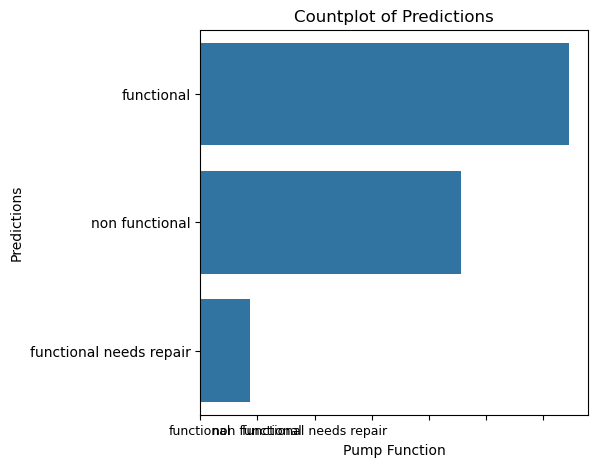

In [28]:
# Ploting distribution of target variable.
fig, ax = plt.subplots(figsize=(5, 5))
sns.countplot(df2['status_group'])
x_labels = df2['status_group'].unique()

# Add labels
plt.title('Countplot of Predictions')
plt.xlabel('Pump Function')
ax.set_xticklabels(x_labels, fontsize=9)
plt.ylabel('Predictions')
plt.show()



With this , we can now note that the functional wells are the ones with a high rate comared to those non-fucntional having a smaller ratio.

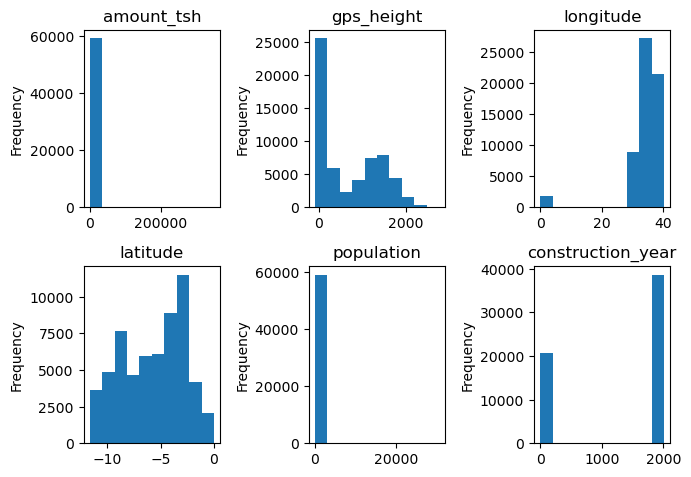

In [30]:
#for categorical data , we can use a histogram to represent 
continuous = ['amount_tsh','gps_height','longitude','latitude','population','construction_year']
fig = plt.figure(figsize=(7, 7))
for i, col in enumerate(continuous):
    ax = plt.subplot(3, 3, i+1)
    df2[col].plot(kind='hist', ax=ax, title=col)
plt.tight_layout()
plt.show()

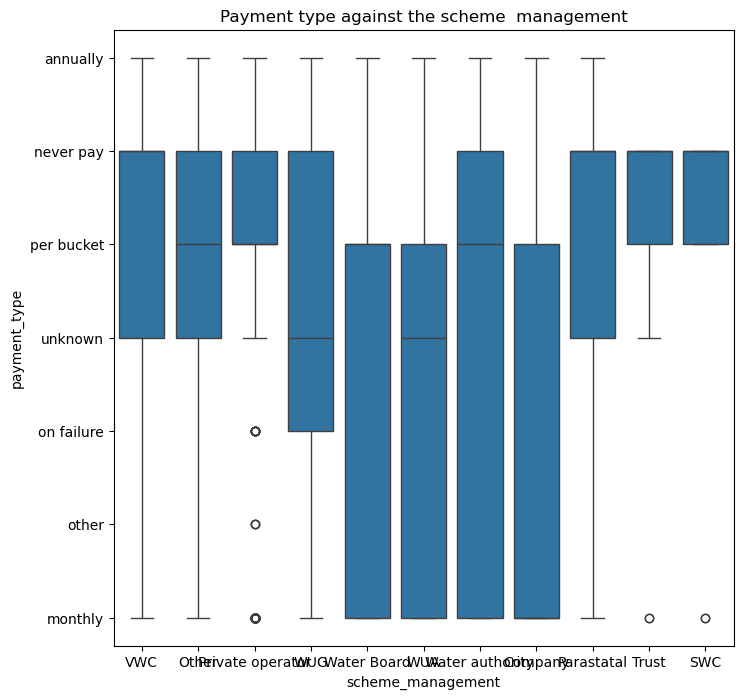

In [ ]:
# Box plot for 'scheme_management' grouped by 'payment_type'
plt.figure(figsize=(8, 8))
sns.boxplot(x='scheme_management', y='payment_type', data=df_filtered)
plt.title('Payment type against the scheme  management')
plt.show()

In [ ]:
#RELATIONSHIP BETWEEN COMPANY FUNDING AND AMOUNT PROVIDED
grouped = df.groupby('installer')['amount_tsh'].describe()
print(grouped)


### MULTIVARIATE ANALYSIS

After careful bivariate and univariate analysis , we can begin on multivariate to ensure complete analysis on the data present.

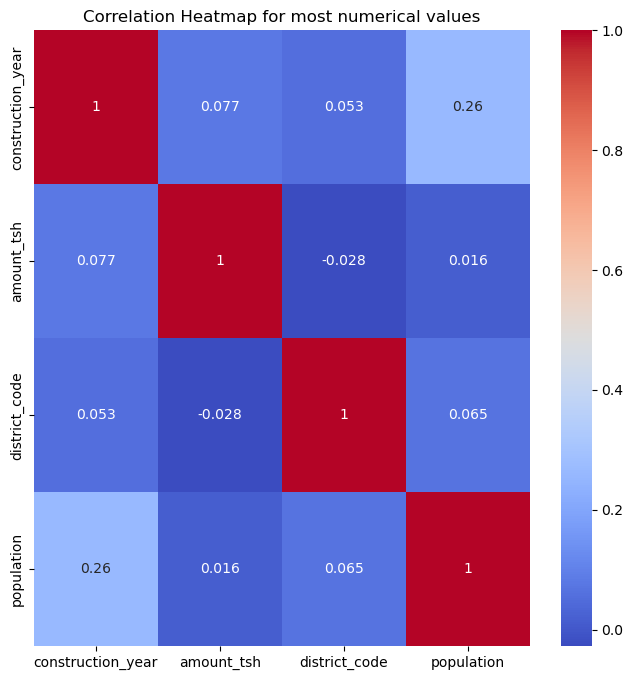

In [ ]:
#for the numerical details , we will use a correlation heatmap
correlation_matrix = df_filtered[['construction_year', 'amount_tsh','district_code','population']].corr()
plt.figure(figsize=(8, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap for most numerical values')
plt.show()

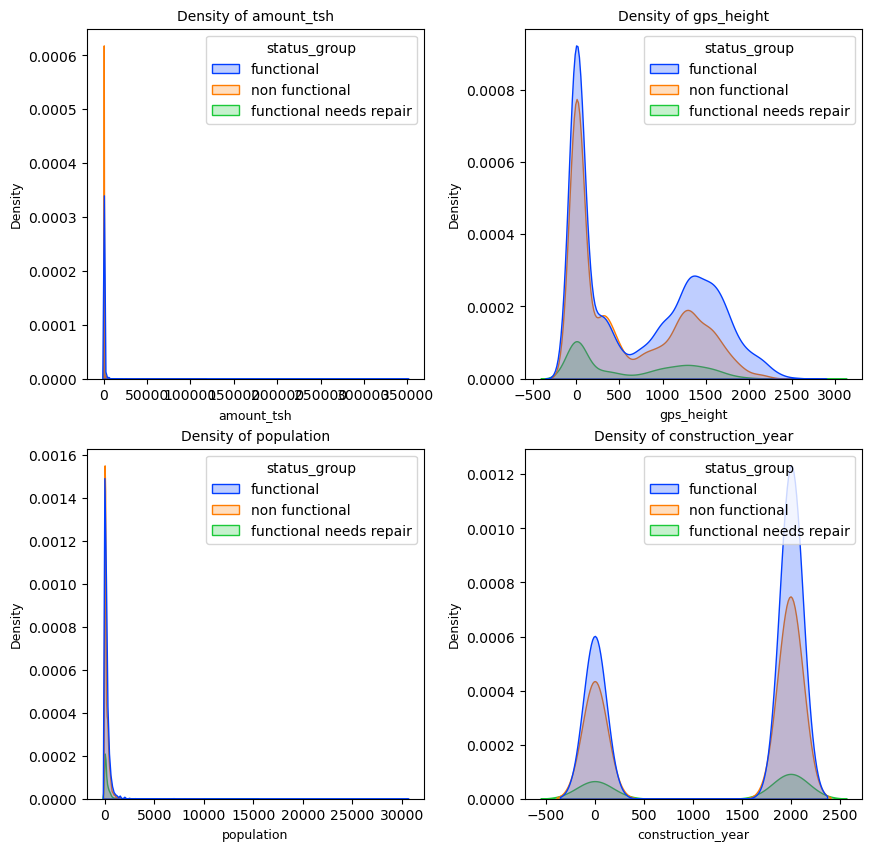

In [31]:
# check the target variable against continous data values
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 10))
fig.subplots_adjust(hspace=0.2, wspace=0.3)  # Increase hspace and wspace

# Create count bar plots for continuous variables
continuous = ['amount_tsh','gps_height',
              'population','construction_year']

for i, column in enumerate(continuous):
    row, col = i // 2, i % 2
    sns.kdeplot(data=df, x=column, hue='status_group', palette='bright', 
                fill=True, ax=axes[row, col])
    axes[row, col].set_title(f'Density of {column}', fontsize=10)
    axes[row, col].set_xlabel(column, fontsize=9)
    axes[row, col].set_ylabel('Density', fontsize=9)

plt.show()

Now that we have been successful in data cleaning and eda analysis, we can now begin with the machine learning section .This involves now getting into the nitty gritty section of the project .Here we can evaluate the objectives and come up with different observations that will help us gain more insight into the data .


### FEATURE AND PREDICTOR 


In [32]:
# choosing the target(status_group) and all others as the target variable
y = df2['status_group']

X = df2.drop('status_group', axis=1)
X.head()

,id,amount_tsh,gps_height,installer,longitude,latitude,basin,region,population,public_meeting,scheme_management,permit,construction_year,extraction_type_class,management_group,payment_type,water_quality,quantity_group,source_class,waterpoint_type_group
0,69572,6000.0,1390,Roman,34.938093,-9.856322,Lake Nyasa,Iringa,109,True,VWC,False,1999,gravity,user-group,annually,soft,enough,groundwater,communal standpipe
1,8776,0.0,1399,GRUMETI,34.698766,-2.147466,Lake Victoria,Mara,280,NaN,Other,True,2010,gravity,user-group,never pay,soft,insufficient,surface,communal standpipe
2,34310,25.0,686,World vision,37.460664,-3.821329,Pangani,Manyara,250,True,VWC,True,2009,gravity,user-group,per bucket,soft,enough,surface,communal standpipe
3,67743,0.0,263,UNICEF,38.486161,-11.155298,Ruvuma / Southern Coast,Mtwara,58,True,VWC,True,1986,submersible,user-group,never pay,soft,dry,groundwater,communal standpipe
4,19728,0.0,0,Artisan,31.130847,-1.825359,Lake Victoria,Kagera,0,True,NaN,True,0,gravity,other,never pay,soft,seasonal,surface,communal standpipe


## MODEL AND MACHINE LEARNING.

In [33]:
#convert categorical features and binary features
categ_col = ['installer', 'basin', 'region', 'scheme_management', 
           'extraction_type_class', 'management_group', 'payment_type', 
           'water_quality', 'quantity_group', 'source_class', 
           'waterpoint_type_group']

cont_col = ['amount_tsh','gps_height','longitude','latitude','population','construction_year']

binary_col = ['public_meeting', 'permit']

Using the grouped columns into either category, binary or count , we can now get dummies for the categorical columns present.

In [37]:
#Create dummies

# Print X
X

,id,amount_tsh,gps_height,longitude,latitude,population,public_meeting,permit,construction_year,installer_-,...,quantity_group_unknown,source_class_groundwater,source_class_surface,source_class_unknown,waterpoint_type_group_cattle trough,waterpoint_type_group_communal standpipe,waterpoint_type_group_dam,waterpoint_type_group_hand pump,waterpoint_type_group_improved spring,waterpoint_type_group_other
0,69572,6000.0,1390,34.938093,-9.856322,109,True,False,1999,False,...,False,True,False,False,False,True,False,False,False,False
1,8776,0.0,1399,34.698766,-2.147466,280,NaN,True,2010,False,...,False,False,True,False,False,True,False,False,False,False
2,34310,25.0,686,37.460664,-3.821329,250,True,True,2009,False,...,False,False,True,False,False,True,False,False,False,False
3,67743,0.0,263,38.486161,-11.155298,58,True,True,1986,False,...,False,True,False,False,False,True,False,False,False,False
4,19728,0.0,0,31.130847,-1.825359,0,True,True,0,False,...,False,False,True,False,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59395,60739,10.0,1210,37.169807,-3.253847,125,True,True,1999,False,...,False,True,False,False,False,True,False,False,False,False
59396,27263,4700.0,1212,35.249991,-9.070629,56,True,True,1996,False,...,False,False,True,False,False,True,False,False,False,False
59397,37057,0.0,0,34.017087,-8.750434,0,True,False,0,False,...,False,True,False,False,False,False,False,True,False,False
59398,31282,0.0,0,35.861315,-6.378573,0,True,True,0,False,...,False,True,False,False,False,False,False,True,False,False


Now I will continue with train and test splitting

In [39]:
X_train , X_test , y_train ,y_test = train_test_split(X,y, test_size=0.3,random_state=43)

Using this we can now begin on model training

In [ ]:
print(X.describe())

                 id     amount_tsh  district_code    population  \
count  56344.000000   56344.000000   56344.000000  56344.000000   
mean   37109.523321     322.126009       5.775469    179.866587   
std    21448.992388    2649.689666       9.865288    464.777124   
min        0.000000       0.000000       0.000000      0.000000   
25%    18511.500000       0.000000       2.000000      0.000000   
50%    37050.000000       0.000000       3.000000     30.000000   
75%    55641.250000      30.000000       5.000000    220.000000   
max    74247.000000  250000.000000      80.000000  30500.000000   

       construction_year  
count       56344.000000  
mean         1302.952116  
std           950.936623  
min             0.000000  
25%             0.000000  
50%          1986.000000  
75%          2004.000000  
max          2013.000000  


In [ ]:
print("Shape of X:", X.shape)
print("Shape of y:", y.shape)


Shape of X: (56344, 18)
Shape of y: (56344,)


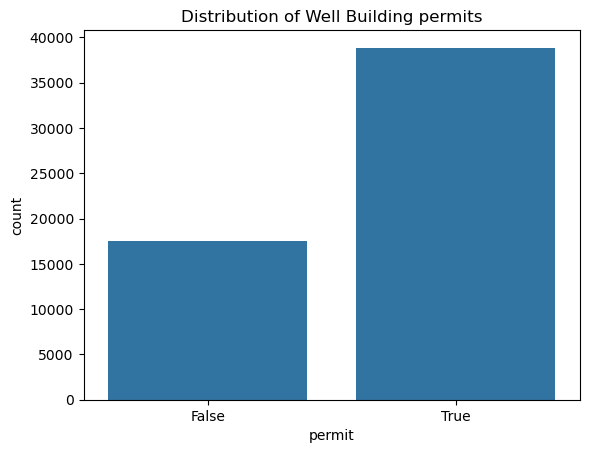

In [ ]:
# visualize to see the relationships between different variables to the target variable
sns.countplot(x='permit', data=df)
plt.title('Distribution of Well Building permits')
plt.show()



In [ ]:
#categorize , string /object variables together and drop the unrequired data variables
X.columns

Index(['id', 'amount_tsh', 'installer', 'wpt_name', 'basin', 'region',
       'district_code', 'lga', 'ward', 'population', 'scheme_management',
       'construction_year', 'management_group', 'payment_type',
       'quality_group', 'quantity_group', 'source_class',
       'waterpoint_type_group'],
      dtype='object')

In [ ]:
#split the dataset using train test split
X_train , X_test , y_train , y_test = train_test_split(X , y, test_size=0.3,random_state = 42)

#print the splitted sets shapes 
print(f'Training set features (X_train): {X_train.shape}')
print(f'Testing set features (X_test): {X_test.shape}')
print(f'Training set target (y_train): {y_train.shape}')
print(f'Testing set target (y_test): {y_test.shape}')

Training set features (X_train): (39440, 18)
Testing set features (X_test): (16904, 18)
Training set target (y_train): (39440,)
Testing set target (y_test): (16904,)


Now that we have the target variable and the features to helpp in training and testing our model , we will have to first introduce an encoder for our target variable having different categories .

With this , we can now begin encoding the major categorical values in our dataset in essence restricting the number of categories to 3 or 4 variables.


In [ ]:
# Define a threshold for rare categories especially ones that occur less than 5 times
threshold = 5

# Group categories 
for col in categorical_columns:
    freq = X[col].value_counts()
    rare_categories = freq[freq < threshold].index
    X[col] = X[col].replace(rare_categories, 'Other')

# Check the new distribution of categories
for col in categorical_columns:
    print(f"Unique values in '{col}': {X[col].nunique()}")
    print(X[col].value_counts().head())  # Show the most frequent values
    print()


In [ ]:
X['quality_group'].unique()

array(['good', 'salty', 'milky', 'colored', 'unknown', 'fluoride'],
      dtype=object)

In [ ]:
#combining categories based on domain knowledge
X['quality_group'] = X['quality_group'].replace({
    'good': 'Excellent',  # Combine 'Poor' with 'Fair'
    'salty': 'unknown',
    'milky': 'colored', 
    'fluoride':'bad' # Combine 'Excellent' with 'Good'
})

# Check the new distribution of categories
print(df['quality_group'].value_counts())

# binning ordinal categories
X['quality_group'] = X['quality_group'].replace({
    'unknown': 'Low',
    'colored': 'Low',
    'fluoride': 'Low',
    'good': 'High',
    'salty':'low'
})

# Check the new distribution of categories
print(df['quality_group'].value_counts())


quality_group
good        12098
salty        1272
unknown       359
milky         201
colored       133
fluoride       50
Name: count, dtype: int64
quality_group
good        12098
salty        1272
unknown       359
milky         201
colored       133
fluoride       50
Name: count, dtype: int64


we notice that binning and reducing is making it hard to reduce the number of variables using feature reducing 

In [ ]:
y.shape

(14113,)

In [ ]:
y

array([1, 1, 1, ..., 0, 1, 1])

For this objectives , we would be required to conduct a multiclass classification model and come up with different observations especially with one either being granted a permit annd others not being granted one .

### MULTICLASS CLASSIFICATION

Afteer noting that our dataset  has many object variables in grouped version, we would be required to perform certain imputations to avoid overstretching our model or making it become complicated.

In [ ]:
# We will begin by the use of the RandomForestClassifier 
from sklearn.ensemble import RandomForestClassifier

#initiate the model 
model =  RandomForestClassifier(random_state=43)
model.fit(X_train, y_train)

ValueError: could not convert string to float: 'DWE'